In [4]:
import numpy as np
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets
import matplotlib.pyplot as plt

In [3]:
X, color = datasets._samples_generator.make_swiss_roll(1500)
cluster_swiss_roll = KMeans(n_clusters=100, random_state=1).fit_predict(X)


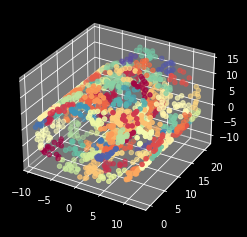

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=cluster_swiss_roll, cmap='Spectral')

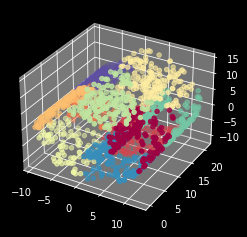

In [10]:
X, color = datasets._samples_generator.make_swiss_roll(1500)
cluster_swiss_roll = KMeans(n_clusters=10, random_state=1).fit_predict(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=cluster_swiss_roll, cmap='Spectral')


In [20]:
class KMeanFeaturizer:
    def __init__(self, k=100, target_scale=5.0, random_state = None) -> None:
        self.k = k
        self.target_scale = target_scale
        self.random_state = random_state
    
    def fit(self, X, y = None):
        if y is None:
            km_model = KMeans(n_clusters=self.k, n_init=20, random_state=self.random_state)
            km_model.fit(X)

            self.km_model = km_model
            self.cluster_centers_ = km_model.cluster_centers_
            return self
    
        data_with_target = np.hstack((X, y[:, np.newaxis]*self.target_scale))
        km_model_pretrain = KMeans(n_clusters=self.k, n_init=20, random_state=self.random_state)
        km_model_pretrain.fit(data_with_target)

        km_model = KMeans(n_clusters=self.k, init=km_model_pretrain.cluster_centers_[:, :2],n_init=1, max_iter=1)

        km_model.fit(X)

        self.km_model = km_model
        self.cluster_centers_ = km_model.cluster_centers_
        return self
    def transform(self, X, y=None):
        clusters = self.km_model.predict(X)
        return clusters[:, np.newaxis]
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X, y)


In [18]:
training_data, training_labels = datasets.make_moons(n_samples=2000, noise=.2)
test_data, test_labels = datasets.make_moons(n_samples=2000, noise=.3)

In [16]:
test_data

array([[ 0.73711949,  0.81486784],
       [ 2.28379278, -0.55578545],
       [ 0.43799718, -0.42746195],
       ...,
       [ 1.30742301, -0.43152487],
       [ 2.06172254,  0.88204666],
       [-0.72319603,  0.74615674]])

In [17]:
test_labels


array([0, 1, 1, ..., 0, 1, 0])

In [21]:
kmf_hint = KMeanFeaturizer(k=100, target_scale=10).fit(training_data, training_labels)

In [22]:
training_cluster_features = kmf_hint.transform(training_data)
test_cluster_features = kmf_hint.transform(training_labels)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 1. ... 1. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [2]:
(1.18)**2/(1+0.12)-1

0.24321428571428538